# This notebook contains Python implementations of the code in [The Scientist and Engineer's Guide to Digital Signal Processing by By Steven W. Smith, Ph.D.](https://www.dspguide.com/)  The code is an almost exact translation of the BASIC code into Python, which will result in bad/low-performance/ugly python code (e.g. looping everything). When rewriting the sample code, I've purposefully left out all sort of nice python features (e.g. enumerate) to match the original code closely.

# For the code samples, I've tried to avoid using numpy or scipy because the goal of the example code is to show and explain how some of these DSP functions are actually implemented.  In any non-academic setting it would be more pragmatic to use a numpy array and not a python list, but I think it's easier to stick to the spirit of the original BASIC code using standard python data structures and functions.  

# I have used numpy and scipy for some things. The sample code in the textbook doesn't contain actual signal data, have code for plotting, etc.  I wanted every code sample to actually run, so I have used numpy and scipy to generate data and to analyze the output of the algorithms.

In [1]:
import numpy as np
import random
import math
from matplotlib import pyplot as plt
import scipy
from PIL import Image, ImageFilter # For Chapter 24
%load_ext watermark

random.seed(1234)

In [2]:
%watermark

Last updated: 2024-09-30T12:26:58.062835-04:00

Python implementation: CPython
Python version       : 3.12.2
IPython version      : 8.20.0

Compiler    : MSC v.1937 64 bit (AMD64)
OS          : Windows
Release     : 11
Machine     : AMD64
Processor   : Intel64 Family 6 Model 141 Stepping 1, GenuineIntel
CPU cores   : 12
Architecture: 64bit



In [3]:
%watermark --iversions

scipy     : 1.11.3
numpy     : 1.26.4
matplotlib: 3.8.0
PIL       : 10.3.0



# Chapter 2 - Statistics, Probability and Noise

## 2-1 Calculate Mean and Standard Deviation

In [4]:
n = 512
#Generate random integers
x = [random.randint(0,3) for i in range(n)]

mean=0
for i in range(512):
    mean = mean + x[i]
mean = mean/n

variance = 0
for i in range(512):
    variance = variance + (x[i] - mean)**2
sd = math.sqrt(variance/(n-1))
print(f'Mean:{round(mean,2)},Standard Deviation:{round(sd,2)}')

Mean:1.54,Standard Deviation:1.11


## 2-2 Calculate Running Mean and Standard Deviation

In [5]:
#Generate random integers
x = [random.randint(0,3) for i in range(10)]
n= 0               
total = 0 #Sum is a python function, so we cannot use it as a variable name
sum_squares = 0

#Since this is a "running" or streaming calcualation, the loop simulates values arriving one after another, and then the statistics are calculated for every new value
for i in range(len(x)):
    n = n+1         
    total = total + x[i]
    sum_squares = sum_squares + x[i]**2
    mean = total/n
    #I needed to add this if statement because when n is 1, the denominator for the variance calcualation is zero. This is listed as errata on the book website. 
    if n > 1:
        variance = (sum_squares - total**2/n) / (n-1)
    else:
        variance = (sum_squares - total**2/n) / (n)
    sd = math.sqrt(variance)
    print(f'Mean:{round(mean,2)},Standard Deviation:{round(sd,2)}')

Mean:3.0,Standard Deviation:0.0
Mean:1.5,Standard Deviation:2.12
Mean:1.67,Standard Deviation:1.53
Mean:1.5,Standard Deviation:1.29
Mean:1.8,Standard Deviation:1.3
Mean:2.0,Standard Deviation:1.26
Mean:1.86,Standard Deviation:1.21
Mean:1.88,Standard Deviation:1.13
Mean:1.78,Standard Deviation:1.09
Mean:1.9,Standard Deviation:1.1


## 2-3 Calculate the Histogram, mean, and standard deviations

In [6]:
n = 25001
#Generate random integers
x = [random.randint(0,254) for i in range(n)]

#Initialise list of histogram values
h = []
for i in range(255):
    h.append(0)

#Calculate Histogram
for i in range(len(x)):
    h[x[i]] = h[x[i]] + 1

mean = 0
for i in range(len(h)):
    mean = mean + i * h[i]
mean = mean / n

variance = 0
for i in range(len(h)):
    variance = variance + h[i] * (i - mean)**2
variance = variance / (n-1)
sd = math.sqrt(variance)
print(f'Mean:{round(mean,2)},Standard Deviation:{round(sd,2)}')

Mean:127.69,Standard Deviation:73.95


## 2-4 Calculating the Binned Histogram

In [7]:
n = 25000
#Generate random integers
x = [random.random()*10 for i in range(n)]

#Initialise list of histogram values.  Note that the length of the array is 1000 since so that position 999 exists.
h = []
for i in range(1000):
    h.append(0)

for i in range(n):
    bin_num = int(x[i] * 100) #Multipled by 100 instead of the .01 in the book.  This is listed as errata on the book website. 
    h[bin_num] = h[bin_num]+1

# Chapter 6 - Convolution

## 6-1 Convolution using the input side algorithm

In [8]:
x = [random.randint(0,3) for i in range(80)]
h = [random.randint(0,3) for i in range(30)]

y = []
for i in range(110):
    y.append(0)

for i in range(len(x)):
    for j in range(len(h)):
        y[i+j] = y[i+j] + x[i]*h[j]
print(y)

[1, 3, 4, 3, 2, 5, 8, 11, 15, 19, 18, 17, 24, 28, 29, 32, 37, 35, 44, 39, 42, 44, 37, 40, 41, 43, 50, 34, 55, 41, 41, 45, 35, 34, 44, 55, 52, 53, 46, 37, 41, 37, 38, 34, 47, 40, 37, 58, 45, 30, 43, 34, 39, 36, 44, 49, 55, 39, 39, 36, 53, 37, 37, 46, 57, 42, 47, 47, 37, 44, 57, 51, 51, 52, 51, 45, 53, 42, 39, 54, 53, 37, 56, 50, 51, 44, 42, 30, 46, 38, 24, 24, 41, 34, 31, 20, 22, 22, 20, 4, 6, 14, 14, 6, 3, 9, 15, 12, 6, 0]


## 6-2 Convolution using the output side algorithm

In [9]:
x = [random.randint(0,3) for i in range(80)]
h = [random.randint(0,3) for i in range(30)]

y = []
for i in range(110):
    y.append(0)
    for j in range(len(h)):
        #Python doesn't have a goto statement (for good reason!), so it doesn't make sense to try to recreate the original logic using if and go statements. 
        if ((i - j) >= 0) & ((i - j) < len(x)):
            y[i] = y[i] + h[j] * x[i-j]
print(y)

[0, 0, 3, 2, 8, 14, 14, 18, 11, 21, 26, 20, 24, 26, 32, 31, 32, 34, 39, 46, 48, 57, 58, 53, 69, 64, 58, 77, 70, 64, 71, 68, 64, 73, 69, 67, 74, 71, 53, 58, 74, 58, 60, 70, 58, 51, 56, 53, 53, 56, 55, 61, 45, 43, 40, 51, 47, 53, 53, 57, 46, 58, 50, 67, 67, 69, 72, 76, 58, 67, 66, 78, 71, 79, 82, 74, 68, 86, 75, 88, 87, 80, 70, 74, 59, 67, 57, 67, 54, 65, 57, 53, 42, 50, 39, 41, 35, 40, 30, 27, 28, 22, 19, 23, 20, 13, 13, 5, 3, 0]


# Chapter 8 - The Discrete Fourier Transform

# 8-1 Inverse Discrete Fourier Transform

In [10]:
#Create a signal with the real and imaginary components.  
freq = 5
rex = [0] * 512
imx = [0] * 512
rex[freq] = 100
imx[freq] = 10

#8-1 Code
#Wrapping this in a function because it is used in the code for 17-1
pi = 3.14159265

for k in range(len(rex)):
    rex[k] = rex[k] / len(rex)
    imx[k] = -imx[k] / len(imx)

xx = []
for i in range(512):
    xx.append(0)

for k in range(len(rex)):
    for i in range(len(xx)):
        xx[i] = xx[i] + rex[k] * math.cos(2*pi*k*(i/len(xx)))
        xx[i] = xx[i] + imx[k] * math.sin(2*pi*k*(i/len(xx)))

#Using the alternate Code 
xx_alt = []
for i in range(512):
    xx_alt.append(0)

for i in range(len(xx_alt)):
    for k in range(len(rex)):
        xx_alt[i] = xx_alt[i] + rex[k] * math.cos(2*pi*k*(i/len(xx_alt)))
        xx_alt[i] = xx_alt[i] + imx[k] * math.sin(2*pi*k*(i/len(xx_alt)))

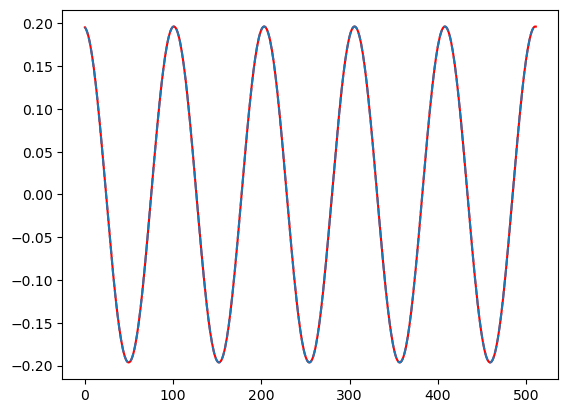

In [11]:
#The Number of postiive peaks in this plot should match the value in the freq variable.
#There are two lines in this plot, red is the first method in 8-1, and blue is the alternate.
plt.plot(range(len(xx)), xx, 'r',range(len(xx_alt)), xx_alt, 'C0--')
plt.show()

# 8-2 Discrete Fourier Transform

In [12]:
#Generate a simple sine wave to test the DFT.
sr = 512 # sampling rate
#Assume we have 1 second of signal
t = np.arange(0,1,1.0/sr)
freq = 10  #frequency 
xx = np.sin(2*np.pi*freq*t)

#8-2 Code starts here
rex = []
imx = []
for i in range(256):
    rex.append(0)
    imx.append(0)

for k in range(len(rex)):
    for i in range(len(xx)):
        rex[k] = rex[k] + xx[i] * math.cos(2*pi*k*(i/len(xx)))
        imx[k] = imx[k] - xx[i] * math.sin(2*pi*k*(i/len(xx)))
print (f'Highest Real Amplitude Frequency after FFT (the value shown here should match the freq variable value): {np.argmax(np.abs(rex))}')
print (f'Highest Imaginary Amplitude Frequency after FFT (the value shown here should match the freq variable value): {np.argmax(np.abs(imx))}')

Highest Real Amplitude Frequency after FFT (the value shown here should match the freq variable value): 10
Highest Imaginary Amplitude Frequency after FFT (the value shown here should match the freq variable value): 10


# 8-3 Rectangular to Polar and Polar to Rectangular Conversion

In [13]:
#Create a signal with the real and imaginary components.  
freq = 5
rex = [0] * 256
imx = [0] * 256
rex[freq] = 2
imx[freq] = 1

#8-3 Code Stars Here
mag = [0] * 256 #This isn't done in the original code, but we need to intialize to length of the array to index it later.
phase = [0] * 256 #This isn't done in the original code, but we need to intialize to length of the array to index it later.
pi = 3.14159265

for k in range(len(rex)):
    mag[k] = math.sqrt(rex[k]**2 + imx[k]**2)
    if rex[k] == 0:
        rex[k] = 1e-20
    phase[k] = math.atan(imx[k] / rex[k])

#Instead of overwriting the original rex and imx variables, let's just create new ones so we can compare the original conversion to polar and back to recangular
rex_conv = [0] * 256
imx_conv = [0] * 256
for i in range(len(rex_conv)):
    rex_conv[i] = mag[i] * math.cos(phase[i])
    imx_conv[i] = mag[i] *  math.sin(phase[i])

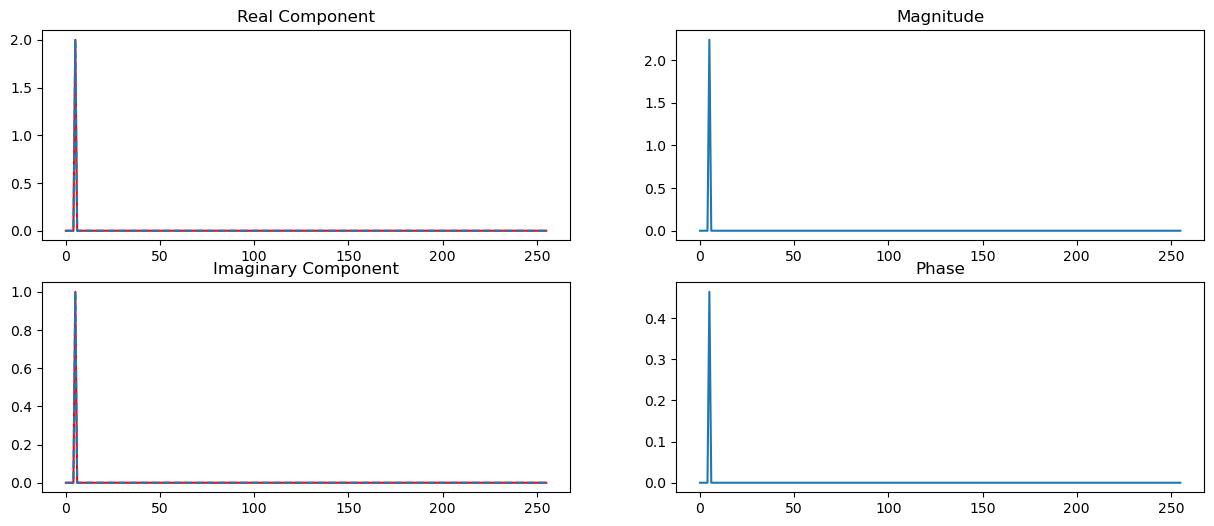

In [14]:
fig,ax = plt.subplots(2,2)
fig.set_size_inches(15,6)
ax[0,0].plot(range(len(rex)),rex, 'r', range(len(rex_conv)), rex_conv, 'C0--')
ax[0,0].set_title('Real Component')
ax[0,1].plot(range(len(mag)),mag)
ax[0,1].set_title('Magnitude')
ax[1,0].plot(range(len(imx)),imx, 'r', range(len(imx_conv)), imx_conv, 'C0--')
ax[1,0].set_title('Imaginary Component')
ax[1,1].plot(range(len(phase)),phase)
ax[1,1].set_title('Phase')
plt.show()

# 8-4 Phase Unwrapping

In [15]:
pi = 3.14159265
#Create sample data with a jagged appearance similar to figure 8-12 in the textbook
phase = np.concatenate([np.linspace(pi,-pi,64)]*4)
uwphase = [0] * 256

#uwphase[0] = 0.  This is in the original BASIC code, but it's not needed since the entire list is initialized to 0.  

for k in range(0, len(phase)):
    #CINT does slightly different things in different implementations of BASIC, but it seems like the reason the original code used it is to round the value to an integer. 
    c = round((uwphase[k-1] - phase[k]) / (2 * pi))
    uwphase[k] = phase[k] + c*2*pi

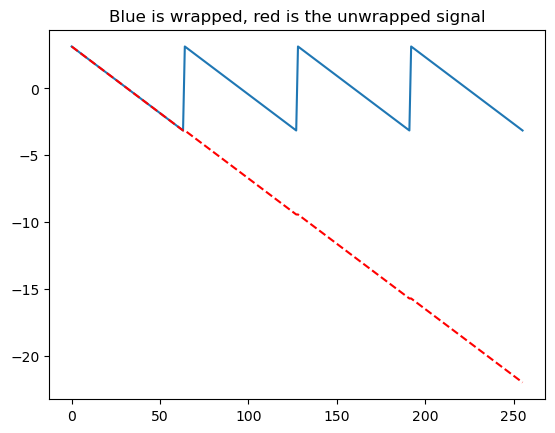

In [16]:
plt.plot(range(256), phase, 'C0', range(256), uwphase,'r--',)
plt.title('Blue is wrapped, red is the unwrapped signal')
plt.show()

# Chapter 12 - The Fast Fourier Transform

# 12-1 Negative Frequency Generation

In [17]:
rex = [0,1,2,3,4,5,6,7,0,0,0,0,0,0,0,0]
imx = [0] * 16

n = len(rex)
#In the book, the loops go from 0 to n-1.  Keep in mind that the range function generates the values from 0 to n-1, so we can use n here instead of the n-1 used in the book
for k in range(n//2+1, n):
    rex[k] =  rex[n-k]
    imx[k] =  rex[n-k]
print(rex)
print(imx)

[0, 1, 2, 3, 4, 5, 6, 7, 0, 7, 6, 5, 4, 3, 2, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 6, 5, 4, 3, 2, 1]


# 12 -2 Complex DFT by Correlation

In [18]:
#Generate a simple sine wave to test the DFT.
srate = 8 # sampling rate
#Assume we have 1 second of signal
t = np.linspace(0,1,8)
freq = 2 #frequency 
xr = np.sin(2*np.pi*freq*t)
xi = [0] * len(xr)

n = len(xr)

pi = 3.14159265            

rex = []
imx = []

#In the book, the loops go from 0 to n-1.  Keep in mind that the range function generates the values from 0 to n-1, so we can use n here instead of the n-1 used in the book
for k in range(n):          
    rex.append(0)               
    imx.append(0)

for k in range(n):         
    for i in range(n):         
        sr = math.cos(2*pi*k*(i/n))      
        si = -math.sin(2*pi*k*(i/n))
        rex[k] = rex[k] + xr[i]*sr - xi[i]*si
        imx[k] = imx[k] + xr[i]*si + xi[i]*sr
print(f'Max Real Frequency:{np.argmax(np.abs(rex[:n//2]))},Max Imaginary Frequency:{np.argmax(np.abs(imx[:n//2]))}')

Max Real Frequency:2,Max Imaginary Frequency:2


# 12 - 4 The Fast Fourier Transform

In [19]:
#Implementation of Code from Table 12-4
#Table 12-5 calls this FFT code, so I'm wrapping it in a function
def dsp_fft(rex,imx,n):
    pi = 3.14159265  
    nm1 = n - 1
    
    nd2 = int(n/2)
    m = round(math.log(n)/math.log(2))
    j = nd2
    
    for i in range(1,n-1):
        if i < j:
            tr = rex[j]
            ti = imx[j]
            rex[j] = rex[i]
            imx[j] = imx[i]
            rex[i] = tr
            imx[i] = ti
        k=nd2
        while k <= j:
            j = j-k
            k = k//2
        j = j+k
    
    #Note that in the BASIC code, the stop of the loop is M (inclusive).  But in Python, to include M you need to use M+1 
    for l in range(1,m+1):
        le = round(2**(l))
        le2  = round(le/2)
        ur = 1
        ui = 0
        sr = math.cos(math.pi/le2)
        si = -math.sin(math.pi/le2)
        #Note that in the BASIC code, the stop of the loop is le2 (inclusive).  But in Python, to include LE2 you need to use LE2+1 
        for j in range(1,le2+1):
            jm1 = j - 1
            #Note that in the BASIC code, the stop of the loop is NM1 (inclusive).  But in Python, to include NM1 you need to use NM1+1 
            for i in range(jm1, nm1+1, le):
                ip = i + le2
                tr = rex[ip]*ur - imx[ip]*ui
                ti = rex[ip]*ui + imx[ip]*ur
                rex[ip] = rex[i] - tr
                imx[ip] = imx[i] - ti
                rex[i] = rex[i] + tr
                imx[i] = imx[i] + ti
            tr = ur
            ur = tr*sr - ui*si
            ui = tr*si + ui*sr
    return rex,imx

#Generate a simple sine wave to test the DFT.
srate = 512 # sampling rate
#Assume we have 1 second of signal
t = np.arange(0,1,1.0/srate)
freq = 78 #frequency 
rex = np.sin(2*np.pi*freq*t)
imx = [0] * len(rex)
rex,imx = dsp_fft(rex,imx, srate)
print(f'Max Real Frequency:{np.argmax(np.abs(rex[:srate//2]))},Max Imaginary Frequency:{np.argmax(np.abs(imx[:srate//2]))}')

Max Real Frequency:78,Max Imaginary Frequency:78


## 12-5 Inverse Fast Fourier Transform

In [20]:
#Generate a simple sine wave to test the DFT.
srate = 256 # sampling rate
#Assume we have 1 second of signal
t = np.arange(0,1,1.0/srate)
freq = 10 #frequency 
rex_orig = np.sin(2*np.pi*freq*t)
imx_orig = [0] * len(rex)

rex,imx = dsp_fft(rex_orig,imx_orig, srate)

#Implementation of Code from Table 12-4
n = len(rex)
for k in range(0, n):
    imx[k] = -imx[k]

rex, imx = dsp_fft(rex,imx,srate)

for i in range(0,n):
    rex[i] = rex[i]/n
    imx[i] = -imx[i]/n

Text(0.5, 1.0, 'The lines should overlap, or at least look similar with the same number of peaks')

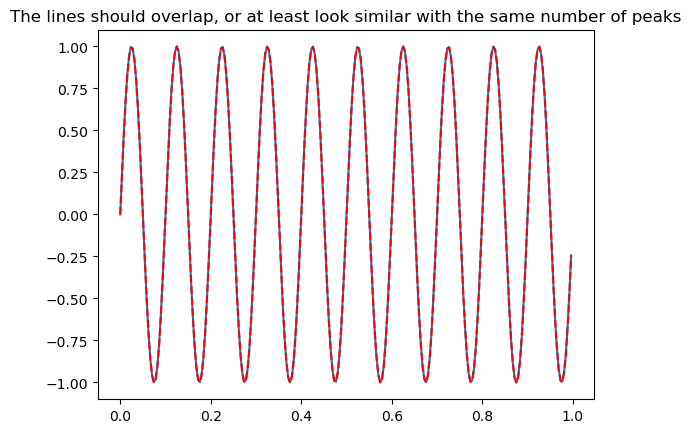

In [21]:
plt.plot(t, rex_orig, 'C0', t,rex,'r--')
plt.title("The lines should overlap, or at least look similar with the same number of peaks")

# 12-7 FFT for Real Signals - This code is before 12-6 because 12-6 calls this FFT code

In [22]:
#Implementation of Code from Table 12-7
#Wrapping this code in a function because it's called by the 12-6 Inverse FFT for Real Signals code
def dsp_real_fft(rex,imx,n):
    #Code for 12-7 starts here
    nh = n//2-1
    for i in range(0,nh+1):
        rex[i] = rex[2*i]
        imx[i] = rex[2*i+1]
    
    
    n = n//2
    rex,imx = dsp_fft(rex,imx,n)
    n = n*2
    
    nm1 = n-1
    nd2 = n//2
    n4 = n//4-1 
    
    for i in range(1,n4+1):
        im = nd2-i
        ip2 = i+nd2
        ipm = im+nd2
        rex[ip2] = (imx[i] + imx[im])/2
        rex[ipm] = rex[ip2]
        imx[ip2] = -(rex[i] - rex[im])/2
        imx[ipm] = -imx[ip2]
        rex[i]   =  (rex[i] + rex[im])/2
        rex[im]  =  rex[i]
        imx[i]   =  (imx[i] - imx[im])/2
        imx[im]  =  -imx[i]
    rex[n*3//4] = imx[n//4]
    rex[nd2] = imx[0]
    imx[n*3//4] = 0
    imx[nd2] = 0
    imx[n//4] = 0
    imx[0] = 0
    
    pi = 3.14159265
    l = round(math.log(n)/math.log(2))
    le = round(2**(l))
    le2  = round(le/2)
    ur = 1
    ui = 0
    sr = math.cos(math.pi/le2)
    si = -math.sin(math.pi/le2)
    #Note that in the BASIC code, the stop of the loop is le2 (inclusive).  But in Python, to include LE2 you need to use LE2+1 
    for j in range(1,le2+1):
        jm1 = j - 1
         #Note that in the BASIC code, the stop of the loop is NM1 (inclusive).  But in Python, to include NM1 you need to use NM1+1 
        for i in range(jm1, nm1+1, le):
            ip = i + le2
            tr = rex[ip]*ur - imx[ip]*ui
            ti = rex[ip]*ui + imx[ip]*ur
            rex[ip] = rex[i] - tr
            imx[ip] = imx[i] - ti
            rex[i] = rex[i] + tr
            imx[i] = imx[i] + ti
        tr = ur
        ur = tr*sr - ui*si
        ui = tr*si + ui*sr
    return(rex,imx)

#Generate a simple sine wave to test the fft
srate = 256# sampling rate
#Assume we have 1 second of signal
t = np.arange(0,1,1.0/srate)
freq = 91 #frequency 
rex = np.sin(2*np.pi*freq*t)
imx = [0] * len(rex)
rex,imx = dsp_real_fft(rex,imx,srate)
print(f'Max Real Frequency:{np.argmax(np.abs(rex[:srate//2]))},Max Imaginary Frequency:{np.argmax(np.abs(imx[:srate//2]))}')

Max Real Frequency:91,Max Imaginary Frequency:91


# 12-6 Inverse FFT for Real Signals

In [23]:
#Generate a simple sine wave to test the DFT.
srate = 256 # sampling rate
#Assume we have 1 second of signal
t = np.arange(0,1,1.0/srate)
freq = 11 #frequency 
rex_orig = np.sin(2*np.pi*freq*t)
imx_orig = [0] * len(rex)
n = srate
rex,imx = dsp_real_fft(rex_orig,imx_orig, srate)

#Implementation of Code from Table 12-6
for k in range(n//2 + 1, n):
    rex[k] =  rex[n-k]         
    imx[k] = -imx[n-k]

for k in range(n):
    rex[k] =  rex[k] + imx[k]

rex,imx = dsp_real_fft(rex,imx,srate)

for i in range(n):
    rex[i] =  (rex[i] + imx[i])/n         
    imx[i] = 0

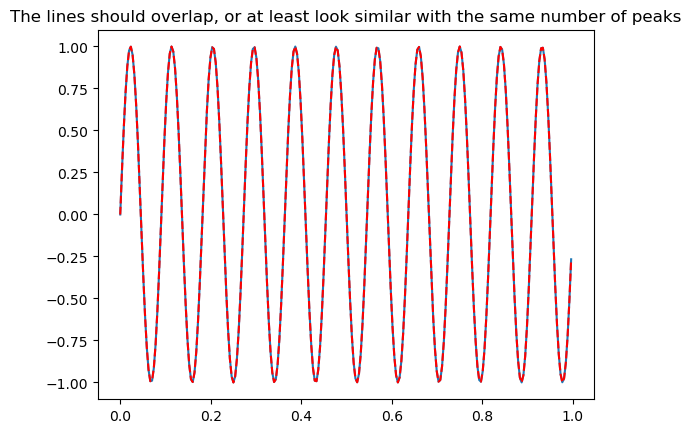

In [24]:
plt.plot(t, rex_orig, 'C0', t,rex,'r--')
plt.title("The lines should overlap, or at least look similar with the same number of peaks")
plt.show()

# Chapter 15 - Moving Average Filters

## 15-1 Moving Average Filter

In [25]:
#Generate Signal
n = 4999
t = np.linspace(0, 1,n)
x = np.sin(2 * np.pi * 2 * t)
x = x + np.random.normal(0,0.3,n)

#15-1 code starts here
y = [0] * n
for i in range(50,n-50):
    y[i] = 0
    for j in range (-50,50):
        y[i] = y[i] + x[i+j]
    y[i] = y[i]/101

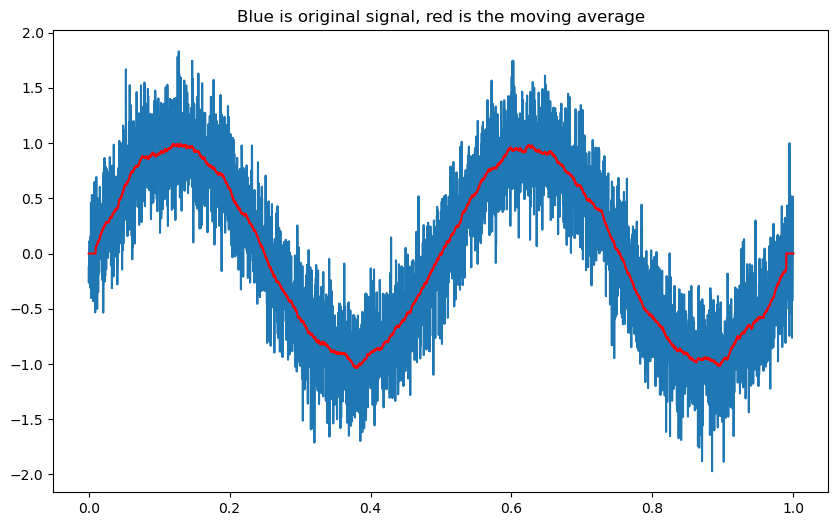

In [26]:
plt.figure(figsize=(10,6))
plt.plot(t,x,'C0', t,y,'r')
plt.title('Blue is original signal, red is the moving average')
plt.show()

## Moving Average Filter Using Recursion

In [27]:
#Generate Signal
n = 4999
t = np.linspace(0,1,n)
x = np.sin(2 * np.pi * 3 * t)
x = x + np.random.normal(0,0.3,n)

#15-2 code starts here
y = [0] * n
acc = 0
for i in range(101):
    acc = acc + x[i]
y[50] = acc/101

for i in range(51,4949):
    acc = acc + x[i+50] - x[i-51]
    y[i] = acc/101

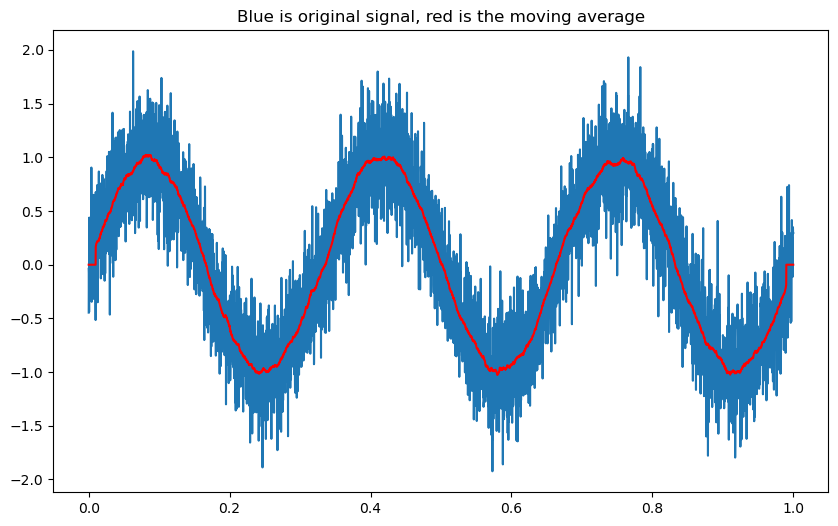

In [28]:
plt.figure(figsize=(10,6))
plt.plot(t,x,'C0', t,y,'r')
plt.title('Blue is original signal, red is the moving average')
plt.show()

## Chapter 16 - Windowed-Sinc Filters

## 16-1 Low-Pass Windowed-Sinc Filter 

In [29]:
#Generate the EEG signal shown in figure 16-5
#The textbook states the sampling rate is 100, taken for 50 seconds.  So x is 5000 datapoints
srate = 100
t = np.linspace(0,1,srate)
#7 and 12 hz for the lower frequencies
x_low = np.sin(2 * np.pi * 7 * t) + np.sin(2 * np.pi * 12 * t)
#17 and 20 hz for the higher frequencies
x_high = np.sin(2 * np.pi * 17 * t) + np.sin(2 * np.pi * 20 * t)
x = x_low+x_high #1 second of data
#Repeat the sample for 50 seconds 
x = np.tile(x,50)

#16-1 Code
y = [0] * len(x)
h = [0] * 101

pi = 3.14159265
#14hz filter
fc = .14         
m = 101

for i in range(m):
    if (i-m/2) == 0:
        h[i] = 2*pi*fc
    else:
        h[i] = math.sin(2*pi*fc*(i-m/2)) / (i-m/2)
        h[i] = h[i] * (0.54 - 0.46*math.cos(2*pi*i/m))

sum = 0  
for i in range(m):
    sum = sum + h[i]

for i in range(m):
    h[i] = h[i] / sum

for j in range(m, 5000):    
    y[j] = 0                  
    for i in range(m):
        y[j] = y[j] + x[j-i] * h[i]

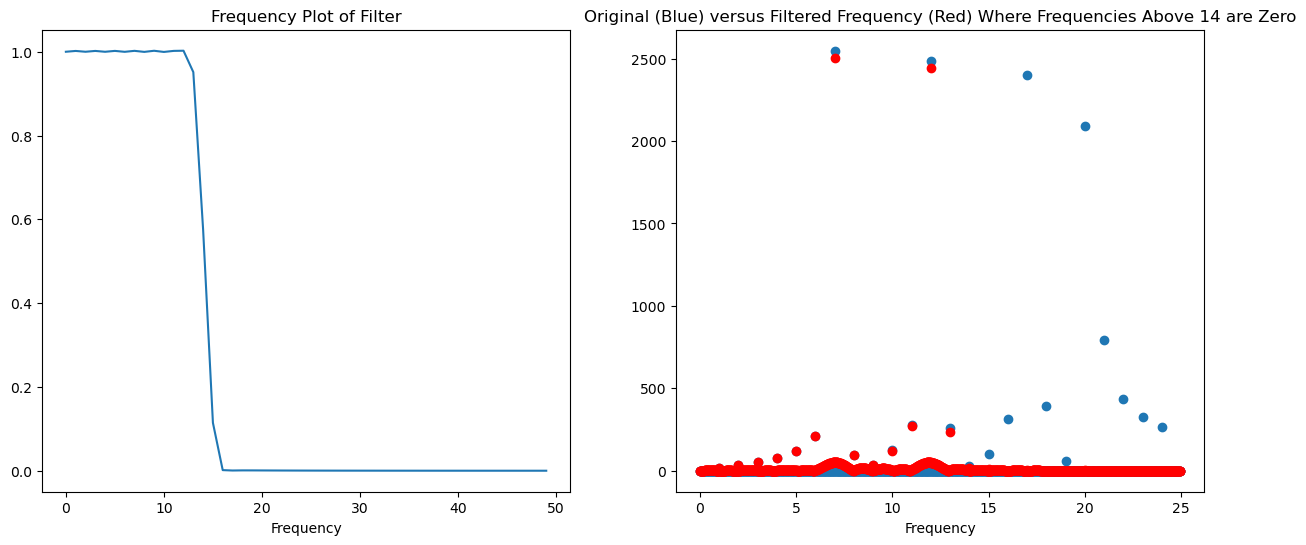

In [30]:
y_out = scipy.fft.fft(y)
frequencies = scipy.fft.fftfreq(5000, 1/100)[:len(y)//2]
#Find index where frequencies are less thatn 25hz
stop_freq = np.max(np.where(frequencies < 25))

fig,ax = plt.subplots(1,2)
fig.set_size_inches(15,6)
#Plot FR of the filter
ax[0].plot(range(50),np.abs(scipy.fft.fft(h)[:50]))
ax[0].set_title('Frequency Plot of Filter')
ax[0].set_xlabel('Frequency')
ax[1].plot(frequencies[:stop_freq],np.abs(scipy.fft.fft(x))[:stop_freq], 'C0o', frequencies[:stop_freq],np.abs(y_out[:stop_freq]), 'ro')
ax[1].set_title('Original (Blue) versus Filtered Frequency (Red) Where Frequencies Above 14 are Zero')
ax[1].set_xlabel('Frequency')
plt.show()

# 16-2 Band-Pass Windowed Sinc-Filter

In [31]:
m = 800
a = [0] * m
b = [0] * m
h = [0] * m
pi = 3.1415926

#Create first low pass filter
fc = 0.196
for i in range(m):
    if (i-m/2) == 0:
        a[i] = 2*pi*fc
    else:
        a[i] = math.sin(2*pi*fc*(i-m/2)) / (i-m/2)
        a[i] = a[i] * (0.42 - 0.5*math.cos(2*pi*i/m) + 0.08*math.cos(4*pi*i/m))

sum = 0  
for i in range(m):
    sum = sum + a[i]

for i in range(m):
    a[i] = a[i] / sum

#create second low pass filter
fc = 0.204
for i in range(m):
    if (i-m/2) == 0:
        b[i] = 2*pi*fc
    else:
        b[i] = math.sin(2*pi*fc*(i-m/2)) / (i-m/2)
        b[i] = b[i] *  (0.42 - 0.5*math.cos(2*pi*i/m) + 0.08*math.cos(4*pi*i/m)) 

sum = 0  
for i in range(m):
    sum = sum + b[i]

for i in range(m):
    b[i] = b[i] / sum

#Convert low pass filter to high pass using spectral inversion
for i in range(m):
    b[i] = -b[i]
b[400] = b[400]+1

#Create band reject filter
for i in range(m):
    h[i] = a[i] + b[i]

#Change to band pass filter using spectral inversion
for i in range(m):
    h[i] = -h[i]
h[400] = h[400]+1

In [32]:
#Let's test the filter this section is not in the book.  
#Generate the signalaling tone discussed on page 293
srate = 10000
t = np.linspace(0,1,srate)

#Generate a band of frequenices between 1500 and 2500 hz
freqs = np.arange(1500,2501,250)
x = np.add.reduce([np.sin(2 * np.pi * f * t) for f in freqs])

#filter the data
y = [0] * len(x)
for j in range(m, len(x)):    
    y[j] = 0                  
    for i in range(m):
        y[j] = y[j] + x[j-i] * h[i]

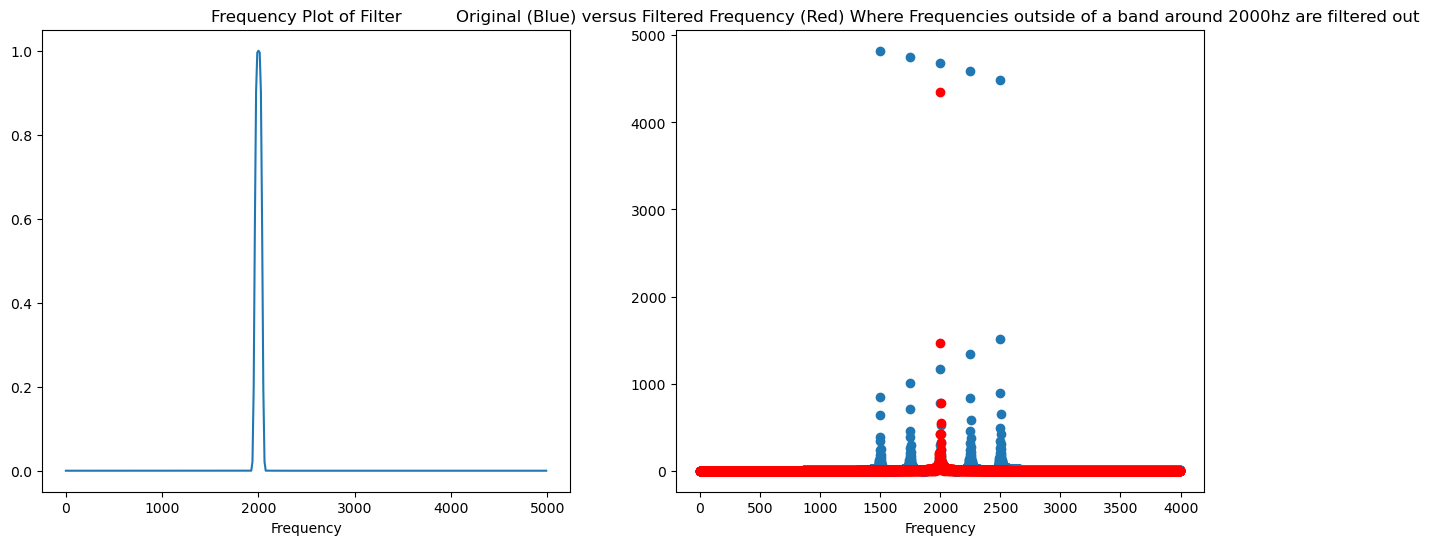

In [33]:
y_out = np.abs(scipy.fft.fft(y))
x_out = np.abs(scipy.fft.fft(x))
filter_frequencies = scipy.fft.fftfreq(800,1/10000)
signal_frequencies = scipy.fft.fftfreq(len(x),1/10000)[:len(x)//2]
#Find index where frequencies are less thatn 25hz
stop_freq = np.max(np.where(signal_frequencies < 4000))

#Get the upper limit for the second plot so the amplitudes of one signal doen't drown out the other
#y_limit = np.min([np.abs(np.max(y_out)),np.abs(np.max(x_out))])

fig,ax = plt.subplots(1,2)
fig.set_size_inches(15,6)
#Plot FR of the filter
ax[0].plot(filter_frequencies[:len(h)//2],np.abs(scipy.fft.fft(h))[:len(h)//2])
ax[0].set_title('Frequency Plot of Filter')
ax[0].set_xlabel('Frequency')
ax[1].plot(signal_frequencies[:stop_freq],x_out[:stop_freq], 'C0o', signal_frequencies[:stop_freq],np.abs(y_out[:stop_freq]), 'ro')
#ax[1].set_ylim([0,25])
ax[1].set_title('Original (Blue) versus Filtered Frequency (Red) Where Frequencies outside of a band around 2000hz are filtered out ')
ax[1].set_xlabel('Frequency')
plt.show()

# Chapter 17 - Custom Filters

## 17-1 Custom filter Design  

### These next two cells are not the code from 17-1.  They are here to recreate Figure 17-1 on page 299

In [34]:
from scipy.interpolate import BSpline, make_smoothing_spline

#Create Designed Frequency response as shown in Figure 17-1 a.
fr_shape_n = 512
fr_phase = [0] * fr_shape_n*2

#First segment
t = np.linspace(0,1,100)
segment_one = np.round(0.5 + np.sin(2 * np.pi *2 * t) / 4,2)

#The more linear or fixed segments
segment_two = np.linspace(0.51,2.5,100)
segment_three = [1] * 70
segment_four = [0] * 30
segment_five = [1] * 100

#Create the curve at the end of the line
spline_y = [0.1,0.2,0.3,0.5,1]
spline_x = [0,2,5,6,10]
spline = make_smoothing_spline(spline_x,spline_y)
segment_six = spline(np.linspace(10,0.1,112))

#Combine segments together
fr_mag_half = np.concatenate([segment_one,segment_two,segment_three,segment_four,segment_five,segment_six])
#Note that we have only made the first half of the signal.  We mirror that for the second half, ending with a FR signal with 1024 points.
fr_mag = np.concatenate([fr_mag_half,np.flip(fr_mag_half)])

In [35]:
#Covert the FR impulse reponse for 17-1b.  The instructions for doing this are on page 298, and state to covert from polar to rectangular and then do the inverse FFT.  

#Covert from polar to rectangular using the code from 8-3
#Note that since all the values of the phase are 0, there is no reason to do this step since all the multiplication values of the cos and sin are 1.  But of the sake of following the textbook, let's do it.
rex_conv = [0] * len(fr_mag)
imx_conv = [0] * len(fr_mag)
for i in range(len(rex_conv)):
    rex_conv[i] = fr_mag[i] * math.cos(fr_phase[i])
    imx_conv[i] = fr_mag[i] * math.sin(fr_phase[i])

#Get the impulse response 
#This is the Inverse FFT Code from Table 12-4
n = len(rex_conv)
for k in range(0, n):
    imx_conv[k] = -imx_conv[k]

impulse_rex, impulse_imx = dsp_fft(rex_conv,imx_conv,len(rex_conv))

for i in range(0,n):
    impulse_rex[i] = impulse_rex[i]/n
    impulse_imx[i] = -impulse_imx[i]/n

### Table 17-1 Basic to Python Code

In [36]:
#Create the filter kernel based on the impulse response.  This is c in figure 17-1
#This is the actual code example in table 17-1
#17-1 code
t = [0] * len(impulse_rex)
pi = 3.14159265
m = 41

filter_kernel_rex = impulse_rex.copy()
filter_kernel_imx = impulse_imx.copy()

for i in range(1024):
    index = i + m//2
    if index > 1023:
        index = index - 1024
    t[index] = filter_kernel_rex[i]

for i in range(1024):
    filter_kernel_rex[i] = t[i]

for i in range(1024):
    if i<=m:
        filter_kernel_rex[i] = filter_kernel_rex[i] * (0.54 - 0.46 * math.cos(2*pi*i/m))
    else:
        filter_kernel_rex[i] = 0

#Check the FR of the filter kernel
filter_kernel_fr = scipy.fft.fft(filter_kernel_rex)

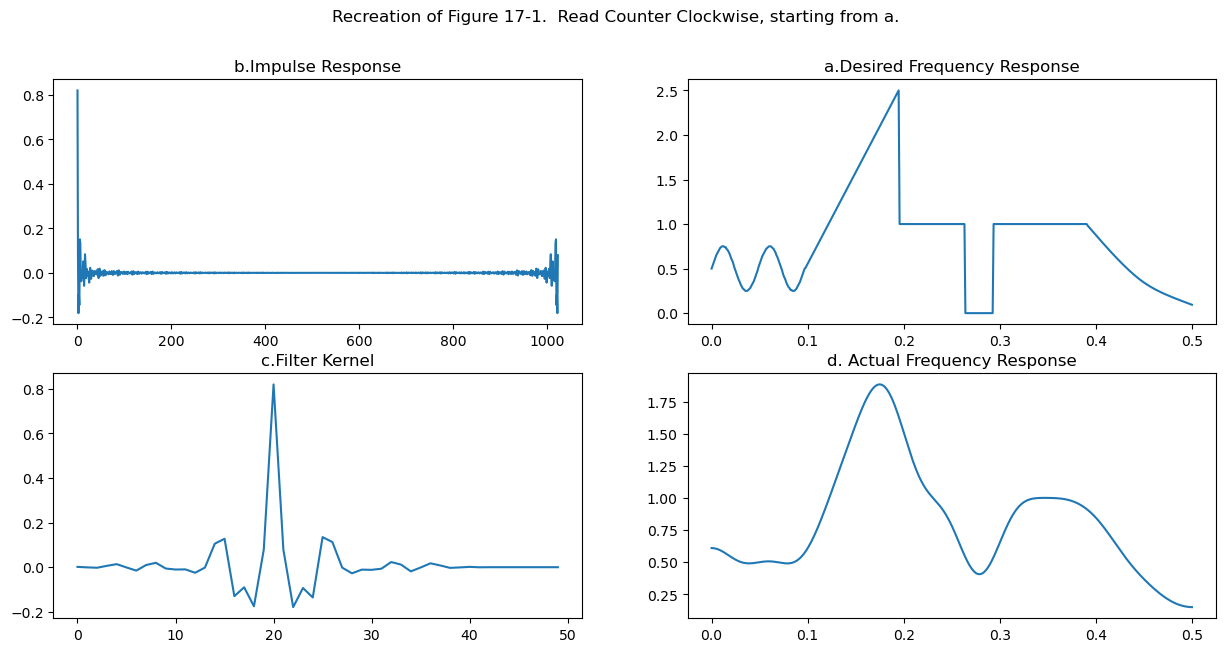

In [37]:
fig,ax = plt.subplots(2,2)
fig.set_size_inches(15,7)
ax[0,0].plot(range(len(impulse_rex)),impulse_rex)
ax[0,0].set_title('b.Impulse Response')
ax[0,1].plot(np.linspace(0,0.5, 512),fr_mag[:512])
ax[0,1].set_title('a.Desired Frequency Response')
ax[1,0].plot(range(50),filter_kernel_rex[:50])
ax[1,0].set_title('c.Filter Kernel')
ax[1,1].plot(np.linspace(0,0.5, 512),np.abs(filter_kernel_fr)[:512])
ax[1,1].set_title('d. Actual Frequency Response')
fig.suptitle('Recreation of Figure 17-1.  Read Counter Clockwise, starting from a.')
plt.show()

# Chapter 18 - FFT Convolution

## 18-1 FFT Convolution

In [38]:
#This code has a lot of imaginary functions that are described, but the code is not written.  I'll come back to this one later and write all those functions

# Chapter 19 - Recursive Filters

# Table 19-1 Recursive Filter

In [39]:
#In Figure 19-4, there is a example signal with low and high frequency components.  The x values for filtering the high and low frequency components are below those charts.
#I am going to recreate that signal and then use the same x_values to recreate the output chart.
#Generate Signal as shown in table 19-4 on page 324

# high frequency component
n = 499
t = np.linspace(0,1,n)
x_high = np.sin(2 * np.pi * 50 * t)

#low frequency component
n = 499
t = np.linspace(0,1,n)
x_low = np.cos(2 * np.pi * 0.6 * t)
x = x_low.copy() * 0.3 + 0.5
x[300:400] = x[300:400] + x_high[300:400] * 0.2

#19-1 Code
#I'm not sure what values to use to initialize the y_array, but it's not just 0s.  These two work for this example, but it may be wrong for other signals.
y_low = x.copy()
y_high = [0] * 499

#Instead of calcuating the recursion coefficients, I'm just going to use the formulas on page 323 for the low and high pass filter coefficients.

#Low pass filter
filter_x = 0.95
a0 = 1-filter_x
b1=  filter_x

#Note that we don't need as many coefficients as are shown in the sample code
for i in range(2,499):
    y_low[i] = a0*x[i] + b1*y_low[i-1]

#high Pass Filter
filter_x = 0.86
a0 = (1+filter_x)/2
a1 = -(1+filter_x)/2
b1 =  filter_x
#Note that we don't need as many coefficients as are shown in the sample code

for i in range(2,499):
    y_high[i] = a0*x[i] + a1*x[i-1] + b1*y_high[i-1]

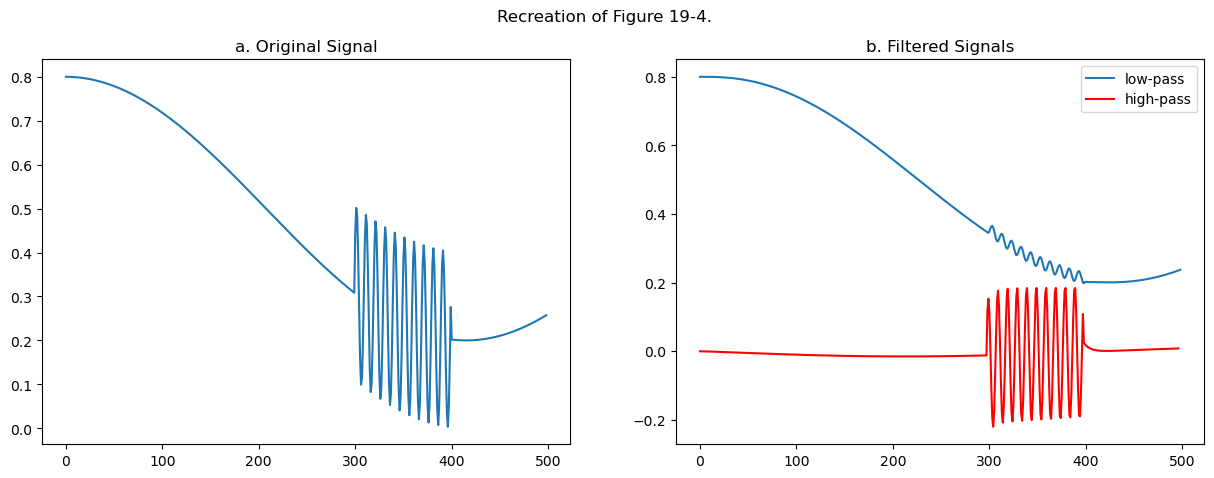

In [40]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(15,5)
ax[0].plot(range(len(x)),x)
ax[0].set_title('a. Original Signal')
ax[1].plot(range(len(y_low)),y_low, label="low-pass")
ax[1].plot(range(len(y_high)-2),y_high[2:],"-r",label="high-pass")
ax[1].set_title('b. Filtered Signals')
fig.suptitle('Recreation of Figure 19-4.')
plt.legend(loc="upper right")
plt.show()

# Chapter 20 - Chebyshev Filters

## Table 20-5 (This code is called from the code in table 20-4 so I've put it first)

In [41]:
#Code for Table 20-5
def calc_coefficients(pi, fc, lh, pr, n_poles, p, debug=False):
    #The debug parameter is used to print out intermediary values to debug this function
    #Examples of input and expected output values are on page 342
    
    rp = -np.cos(pi/(n_poles*2) + (p-1) * pi/n_poles)
    ip =   np.sin(pi/(n_poles*2) + (p-1) * pi/n_poles)
    
    #warp from a circle to an ellipse
    if (pr != 0):
        es = np.sqrt( (100 / (100-pr))**2 -1 )
        vx = (1/n_poles) * np.log( (1/es) + np.sqrt( (1/es**2) + 1) )
        kx = (1/n_poles) * np.log( (1/es) + np.sqrt( (1/es**2) - 1) )
        kx = (np.exp(kx) + np.exp(-kx))/2
        rp = rp * ( (np.exp(vx) - np.exp(-vx) ) /2 ) / kx
        ip  = ip * ( (np.exp(vx) + np.exp(-vx) ) /2 ) / kx
    if debug == True:
        if 'es' in locals():
            print(f'Line 1200 Debug {rp,ip,es,vx,kx}')
        else:
            print(f'Line 1200 Debug {rp,ip}')
        
    #s-domain to z-domain conversion
    t  = 2 * np.tan(1/2)
    w  = 2*pi*fc
    m  = rp**2 + ip**2
    d = 4 - 4*rp*t + m*t**2
    x0 = t**2/d
    x1 = 2*t**2/d
    x2 = t**2/d
    y1 = (8 - 2*m*t**2)/d
    y2 = (-4 - 4*rp*t - m*t**2)/d
    if debug == True:
        print(f'Line 1310 Debug {t,w,m,d,x0,x1,x2,y1,y2}')
    #lp to lp, or lp to hp transform
    
    if (lh == 1):
        k = -np.cos(w/2 + 1/2) / np.cos(w/2 - 1/2)
    if (lh == 0) :
        k =  np.sin(1/2 - w/2) / np.sin(1/2 + w/2)
    d = 1 + y1*k - y2*k**2
    a0 = (x0 - x1*k + x2*k**2)/d
    a1 = (-2*x0*k + x1 + x1*k**2 - 2*x2*k)/d
    a2 = (x0*k**2 - x1*k + x2)/d
    b1 = (2*k + y1 + y1*k**2 - 2*y2*k)/d
    b2 = (-k**2 - y1*k + y2)/d
    if (lh == 1):
        a1 = -a1
        b1 = -b1
    
    if debug == True:
        print(f'Return Values {a0,a1,a2,b1,b2}')
    return(a0,a1,a2,b1,b2)

In [42]:
#Check Ouputs using Data Set 1
a0,a1,a2,b1,b2 = calc_coefficients(3.141592,0.1,0,0,4,1)
if np.array_equal(np.array([0.061885,  0.123770 ,  0.061885,  1.048600 , -0.296140]),np.round((a0,a1,a2,b1,b2),6)):
    print("Values Match")

Values Match


In [43]:
a0,a1,a2,b1,b2 = calc_coefficients(3.141592,0.1,1,10,4,2)
#I had to modify the last digits of the expected outputs to match the rounding from numpy
if np.array_equal(np.array([0.92292 , -1.845840,  0.92292,  1.446913, -0.836654]),np.round((a0,a1,a2,b1,b2),6)):
    print("Values Match")

Values Match


# Table 20-4 Chebyshev filter recursion coefficient calculation

In [44]:
#initialize variables
a = []            #holds the "a" coefficients upon program completion
b = []              #holds the "b" coefficients upon program completion
ta = [0] * 23         #internal use for combining stages
tb = [0] * 23         #internal use for combining stages

for _ in range(23):
  a.append(0)
  b.append(0)

a[2] = 1
b[2] = 1
pi = 3.14159

fc = 0.2        #Enter cutoff frequency  (0 to .5)
lh = 1          #0 for low-pass filter, 1 for high-pass
pr = 0.5          #ripple percent (0 to 29)
n_poles = 6      # number of poles 

for p in range(1, (n_poles //2)+1):
    
    a0,a1,a2,b1,b2 = calc_coefficients(pi, fc, lh, pr, n_poles, p)
    for i in range(23):    
        ta[i] = a[i]
        tb[i] = b[i]
    
    for i in range(2,23):
        a[i] = a0*ta[i] + a1*ta[i-1] + a2*ta[i-2]
        b[i] = tb[i] - b1*tb[i-1] - b2*tb[i-2]

b[2] = 0                #finish combining coefficients
for i in range(20):
    a[i] = a[i+2]
    b[i] = -b[i+2]


sa = 0                  #normalize the gain
sb = 0
for i in range(20):
  if lh == 0:
    sa = sa + a[i]
    sb = sb +  b[i]
  elif lh == 1:
    sa =  sa +  a[i] * (-1)**i
    sb =  sb +  b[i] * (-1)**i

gain = sa / (1 - sb)

for i in range(20):
   a[i] = a[i] / gain
#the final recursion coefficients are in a[ ] & b[ ]

In [45]:
#This prints the output coefficients based on the fc,lh,pr,and n_poles used.  To validate these values, I used the lookup table 20-1 and 20-2 on pages 336 and 337.  I tried some different values and compared the stated coefficients to make sure they matched. 
print(f"""
A Coefficients{a[:n_poles+1]},
B Coefficients: {b[:n_poles+1]}""")


A Coefficients[0.03997495711533825, -0.23984974269202952, 0.5996243567300739, -0.7994991423067651, 0.5996243567300739, -0.23984974269202952, 0.03997495711533826],
B Coefficients: [0, 0.2441194523997438, -1.1303045886221996, -0.10631318554543315, -0.34632830455419145, -0.08882904671888239, -0.032787142069829245]


# Chapter 24 - Linear Image Processing

### Many of the code snippets in this book are more for illustration purposes and will not work without some extra functions and data.  For all the example code code, I've tried to add all the missing pieces so the code samples work.  For table 24-1, I think getting it to work requires more than the time I want to invest.  The main challenge is that to have the input and the output of a convolution to have the same shape (e.g. 100x100), you need to pad the original image.  While it's straightforward with a 3x3 kernel, with a 29x29 kernel, the code in the book results in negative indexes (e.g. array[-2,-2]).  In numpy, negative indexes is allowed.  In BASIC, I really don't know what the result would be, but I doubt you get valid values.  So even if I did get this convolution working with the code sample, I would have to make more modifcations than I think it makes sense to.  So what I've done is used scipy's convolve2D to illustrate what the author was trying to show.  I also have modified the algorithm in the textbook to do a 2d cross-corrlation, which hopefully illustrates the spirit on the convolution in a more understandable way   

## 2D Convolution using scipy

In [46]:
#Load Origincal Image
g_wash_image = Image.open('GWashingtonSquareSmall.jpg')
g_wash_image = g_wash_image.convert('L')
#Extract area we want to search for and trasformations stated in the book
kernel = g_wash_image.crop((45, 25, 73, 53))
kernel = kernel.filter(ImageFilter.FIND_EDGES)
kernel = kernel.rotate(180)

In [47]:
#It's not stated in the book, but subtracting the mean from each value helps this process to work 
g_wash_image = g_wash_image - np.mean(g_wash_image)
kernel = (kernel - np.mean(kernel))
conv = scipy.signal.convolve2d(g_wash_image,kernel,boundary='symm', mode='same')
y, x = np.unravel_index(np.argmax(conv), conv.shape)  #Find match.

C:\Users\ukamath\AppData\Local\Temp\ipykernel_23748\1490627634.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


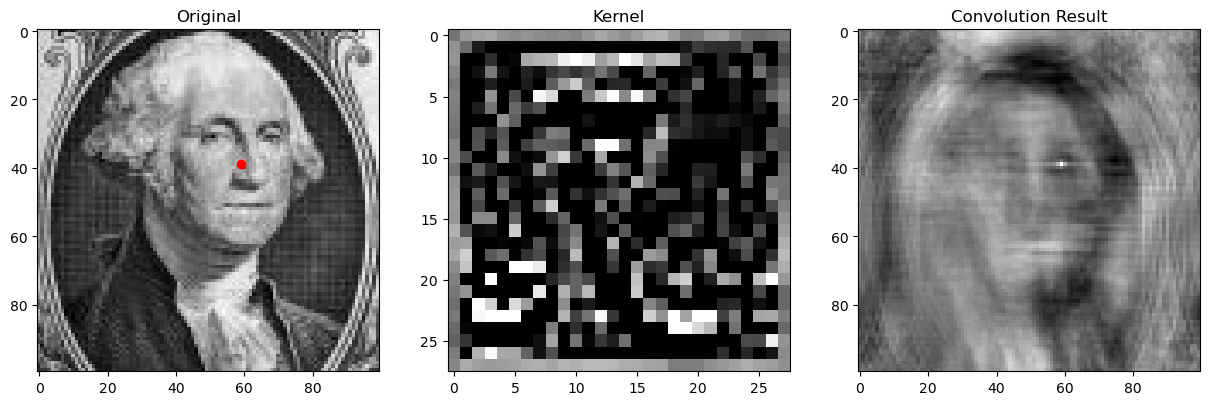

In [48]:
fig, (ax_orig, ax_kernel, ax_conv) = plt.subplots(1, 3, figsize=(15, 6))
ax_orig.imshow(g_wash_image, cmap='gray')
ax_orig.set_title('Original')
ax_kernel.imshow(kernel, cmap='gray')
ax_kernel.set_title('Kernel')
ax_conv.imshow(conv, cmap='gray')
ax_conv.set_title('Convolution Result')
#Plot a red dot where the kernel was found 
ax_orig.plot(x, y, 'ro')
fig.show()

# 2D Cross Correlation

In [49]:
#Load Images
g_wash_image = Image.open('GWashingtonSquareSmall.jpg')
g_wash_image = g_wash_image.convert('L')

#Pad the image
x = np.zeros((128,128))
x[0:100,0:100] = g_wash_image

#Extract area we want to find
#Note that in cross correlation we don't have to perform edge detection or rotate 180 degrees.
h = g_wash_image.crop((45, 25, 73, 53))

#It's not stated in the book, but subtracting the mean from each value helps this process to work 
x = x - np.mean(x)
h = (h - np.mean(h))

#Modified Table 24-1 algorithm to perform cross-correlation
y = np.zeros((128,128))
for r in range(100):
    for c in range (100):
        for j in range (28):
            for k in range (28):
                y[r,c] = y[r,c] + h[k,j] * x[r+k,c+j]

#Find match.  Point returned is upper right hand corner of the kernel where it matched.
y_loc, x_loc = np.where(y == np.max(np.abs(y)))

C:\Users\ukamath\AppData\Local\Temp\ipykernel_23748\2082575501.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


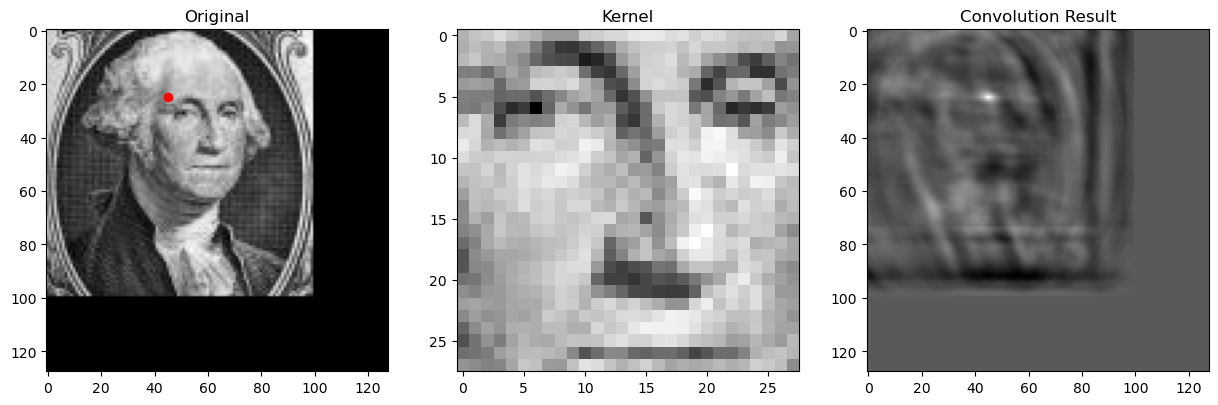

In [50]:
fig, (ax_orig, ax_kernel, ax_corr) = plt.subplots(1, 3, figsize=(15, 6))
ax_orig.imshow(x, cmap='gray')
ax_orig.set_title('Original')
ax_kernel.imshow(h, cmap='gray')
ax_kernel.set_title('Kernel')
ax_corr.imshow(y, cmap='gray')
ax_corr.set_title('Convolution Result')
#Plot a red dot where the kernel was found 
ax_orig.plot(x_loc[0], y_loc[0], 'ro')
fig.show()

# Chapter 25

## Table 25-2

### The code in Table 25-2 is a subroutine that is called from 25-1. That is why this code is here, before the code in Table 25-1. 

In [51]:
def determine_remove_pixel(x,r,c):
    #Subroutine to determine if the pixel at X%[R%,C%] can be removed. If all four of the rules are satisfied, then X[r,c], is set to a 
    #value of 1, indicating it should be removed at the end of the iteration.
    
    #set a default value for the return value as the original value
    original_value = x[r,c]
    #This value will be changed if any of the rules are triggered.  Otherwise it will be changed to white.
    output = 1
    
    #rule 1:  do nothing if the pixel already white
    if x[r,c] == 255:
        output = original_value
    
    #rule 2:  do nothing if all of the close neighbors are black
    if  x[r-1,c] != 255 and x[r,c+1] != 255 and x[r+1,c] != 255 and x[r,c-1] != 255:
        output = original_value
    
    
    #rule 3:  do nothing if only a single neighbor pixel is black
    count = 0
    if x[r-1,c-1] == 0:
        count = count + 1
    if x[r-1,c  ] == 0:
        count = count + 1
    if x[r-1,c+1] == 0:
        count = count + 1
    if x[r  ,c+1] == 0:
        count = count + 1
    if x[r+1,c+1] == 0:
        count = count + 1
    if x[r+1,c  ] == 0:
        count = count + 1
    if x[r+1,c-1] == 0:
        count = count + 1
    if x[r  ,c-1] == 0: 
        count = count + 1
    if count == 1:
        output = original_value
    
    
    #rule 4:  do nothing if the neighbors are unconnected.  determine this by counting the black-to-white transitions
    #while moving clockwise through the 8 neighboring pixels.
    count = 0
    if x[r-1,c-1]  == 0 and x[r-1,c  ] > 0: 
        count = count +1
    if x[r-1,c  ]  == 0 and x[r-1,c+1]  > 0  and x[r  ,c+1] > 0:
        count = count + 1
    if x[r-1,c+1]  == 0 and x[r  ,c+1]  > 0:
        count = count + 1
    if x[r  ,c+1]  == 0 and x[r+1,c+1]  > 0  and x[r+1,c  ] > 0:
        count = count + 1
    if x[r+1,c+1]  == 0 and x[r+1,c  ]  > 0:
        count = count + 1
    if x[r+1,c  ]  == 0 and x[r+1,c-1]  > 0  and x[r  ,c-1] > 0:
        count = count + 1
    if x[r+1,c-1]  == 0 and x[r  ,c-1]  > 0:
        count = count + 1
    if x[r  ,c-1]  == 0 and x[r-1,c-1]  > 0  and x[r-1,c  ] > 0:
        count = count + 1
    if count > 1 :
        output = original_value

    return output

# 25-1 Skeletonization Program

In [52]:
#Load Images
fingerprint = Image.open('fingerprint_large.jpg')
fingerprint = fingerprint.convert('L')

#Extract area we want to find
x = fingerprint.crop((40, 40, 189, 189))

In [53]:
#Convert image to black and white
#The skeletonization algorithm assumes that the image is black and white, with the value 0 for black and 255 for white.  
#The fingerprint image I got from Wikipedia is greyscale, which means that we have to pick a cutoff for what is white and what is black.
#This cutoff has a big impact on the skeletonizaton algorithm.  I tried a bunch of values and picked one that looked decent.
cutoff = 170
x = np.array(x)
x[x > cutoff] = 255
x[x <= cutoff] = 0

In [54]:
#Object pixels have a value of 0 (displayed as black)
#Background pixels have a value of 255 (displayed as white)
y = x.copy()
for iter in range(5):     #run through six iteration loops
    for r in range(1,148,1):    #loop through each pixel in the image.
        for c in range(1,148,1):     
            y[r,c] = determine_remove_pixel(x,r,c)   
            
             
for r in range(149):    #loop through each pixel in the image changing
   for c in range(149):    #the marked pixels from black to white.
       if y[r,c] == 1:
           y[r,c] = 255

Text(0.5, 1.0, 'b. Skeletonized')

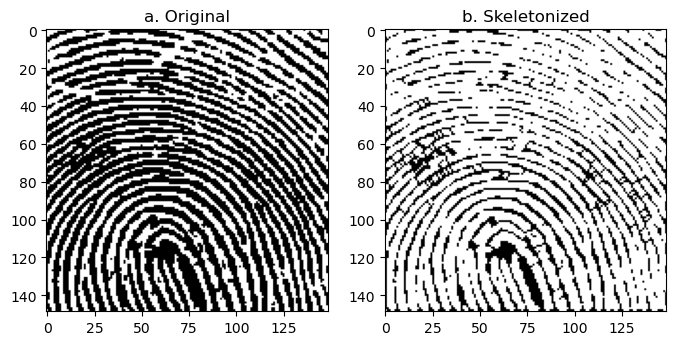

In [55]:
fig, (ax_orig, ax_skel) = plt.subplots(1, 2, figsize=(8, 6))
ax_orig.imshow(x, cmap='gray')
ax_orig.set_title('a. Original')
ax_skel.imshow(y, cmap='gray')
ax_skel.set_title('b. Skeletonized')

# Chapter 26

Chapter 26 focuses on neural networks.  Given all the current attention on deep learning an all the great tutorial published in the few years, I'm not sure I'm going to port the neural network code to Python.  Chapter 25 does contain code snippets for a custom recursive filter, which I will port at some point.